# 🔥Reto 10: Análisis de Frecuencia de Caracteres🔥

## 🏆 Objetivo: 

Crear un programa en Python que analice la frecuencia de aparición de cada carácter en una cadena de texto ingresada por el usuario.


## 📝 Instrucciones:

1. Pide al usuario que ingrese una cadena de texto.  
2. Cuenta cuántas veces aparece cada carácter (mayúsculas y minúsculas deben ser tratadas como iguales).  
3. Muestra los resultados en orden descendente de frecuencia.  
4. Opcional: Representa la frecuencia con un gráfico de barras usando **matplotlib** 📊.

## 📌 Ejemplos de ejecución:

\>>> Ingrese un texto: "Hola mundo"  
Frecuencia de caracteres:  
Letter Frequency:  
o: 2  
h: 1  
l: 1  
a: 1  
m: 1  
u: 1  
n: 1  
d: 1          

## 🔍 Pistas:

1. Usa un diccionario para almacenar las frecuencias.  
2. La función Counter de collections puede ser útil.  
3. Para ordenar por frecuencia, puedes usar sorted() con key=lambda item: item[1].


# Solución propia

In [11]:
def prepare_text(text):
    """
    Converts a text to a string without spaces or accents.
    
    :text: Text to be converted.
    :return: Dictionary with letters as keys and their count as values.
    """
    vowels = {'á': 'a', 'é': 'e', 'í': 'i', 'ó': 'o', 'ú': 'u'}
    text_without_accents = text.lower().replace(' ', '')  # Initialize text_without_accents

    for char in text:
        if char in vowels:
            text_without_accents = text_without_accents.replace(char, vowels[char])
    
    return text_without_accents

def character_frequency(text):
    """
    Counts the frequency of letters in a string.
    
    :text: Text in which the frequency of letters will be counted.
    :return: Displays a frequency table on the screen.
    """
    characters = {}

    for char in text:
        if char not in characters:
            characters[char] = 1
        else:
            characters[char] += 1

    resorted_by_values = dict(sorted(characters.items(), key=lambda item: item[1], reverse=True))

    return resorted_by_values

# Create a list with all punctuation marks.
import string
symbols = set(string.punctuation)

# Loop to get user input
while True:
    try:
        text = input('>>> Enter a word or phrase: ')
        if text.isdigit():
            print('❌ Numbers are not allowed. Try again.')
            continue
        if any(char in symbols for char in text):
            print('❌ Symbols are not allowed. Try again.')
            continue
        break
    except ValueError:
        print('❌ Invalid input. Please enter a valid word or phrase.')

# Process input text
clean_text = prepare_text(text)
frequencies = character_frequency(clean_text)
# Calling the functions

# Print results
print('\nLetter Frequency:')
for letter, freq in frequencies.items():
    print(f'{letter}: {freq}')


>>> Enter a word or phrase:  Otorrinolaringología



Letter Frequency:
o: 5
r: 3
i: 3
n: 2
l: 2
a: 2
g: 2
t: 1


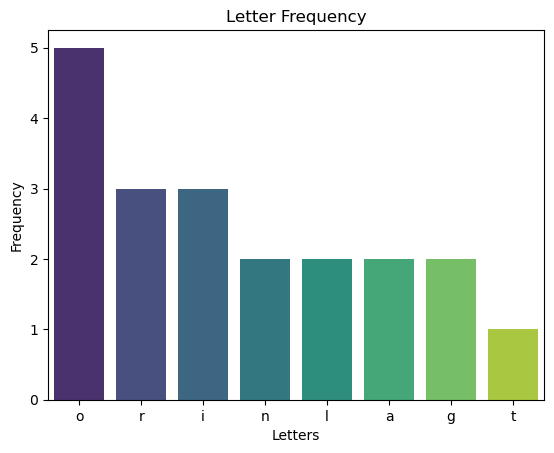

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

def barplot(dictionary):

    # Crear el gráfico de barras
    sns.barplot(x=list(dictionary.keys()), y=list(dictionary.values()), hue=list(dictionary.keys()), palette='viridis', legend=False)

    # Añadir etiquetas y título
    plt.xlabel('Letters')
    plt.ylabel('Frequency')
    plt.title('Letter Frequency')

    # Asegurar que los números del eje y sean enteros
    plt.gca().yaxis.set_major_locator(ticker.MaxNLocator(integer=True))

    # Mostrar el gráfico
    plt.show()

# Calling the functions
clean_text = prepare_text(text)
frequencies = character_frequency(clean_text)
barplot(frequencies)

# Correcciones realizadas por ChatGPT

In [13]:
import string
from collections import Counter

def prepare_text(text):
    """
    Converts a text to lowercase and removes spaces and accents.
    
    :param text: Text to be processed.
    :return: Cleaned text without accents.
    """
    vowels = {'á': 'a', 'é': 'e', 'í': 'i', 'ó': 'o', 'ú': 'u'}
    
    # Convert text to lowercase and remove spaces
    text = text.lower().replace(' ', '')
    
    # Replace accented vowels in a single pass
    text = ''.join(vowels.get(char, char) for char in text)
    
    return text

def character_frequency(text):
    """
    Counts the frequency of letters in a string.
    
    :param text: Text in which the frequency of letters will be counted.
    :return: A dictionary sorted by letter frequency in descending order.
    """
    return dict(sorted(Counter(text).items(), key=lambda item: item[1], reverse=True))

# Set of punctuation symbols
symbols = set(string.punctuation)

# Loop to get user input
while True:
    text = input('>>> Enter a word or phrase: ')
    
    if text.isdigit():
        print('❌ Numbers are not allowed. Try again.')
        continue
    
    if any(char in symbols for char in text):
        print('❌ Symbols are not allowed. Try again.')
        continue
    
    break  # Valid input

# Process input text
clean_text = prepare_text(text)
frequencies = character_frequency(clean_text)

# Print results
print('\nLetter Frequency:')
for letter, freq in frequencies.items():
    print(f'{letter}: {freq}')

>>> Enter a word or phrase:  Otorrinolaringología



Letter Frequency:
o: 5
r: 3
i: 3
n: 2
l: 2
a: 2
g: 2
t: 1


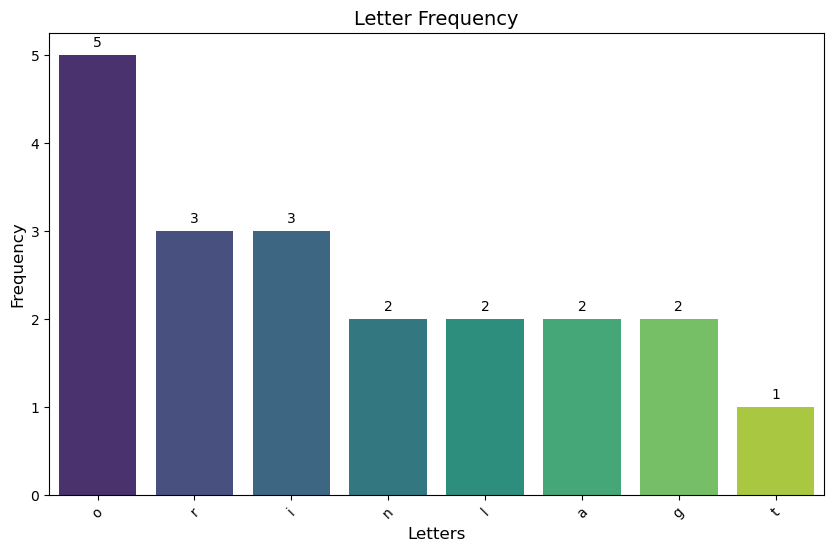

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

def barplot(dictionary):
    """
    Creates a bar plot showing the frequency of letters in a given text.

    :param dictionary: Dictionary containing letters as keys and their frequency as values.
    """
    # Create the plot
    plt.figure(figsize=(10, 6))
    
    # Fix: Assign 'hue' and disable legend to avoid deprecation warning
    sns.barplot(x=list(dictionary.keys()), y=list(dictionary.values()), hue=list(dictionary.keys()), palette="viridis", legend=False)

    # Labels and title
    plt.xlabel('Letters', fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.title('Letter Frequency', fontsize=14)

    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45)

    # Ensure integer values on y-axis
    plt.gca().yaxis.set_major_locator(ticker.MaxNLocator(integer=True))

    # Display value on top of each bar
    for i, v in enumerate(dictionary.values()):
        plt.text(i, v + 0.1, str(v), ha='center', fontsize=10)

    # Show plot
    plt.show()

# Calling the functions
clean_text = prepare_text(text)
frequencies = character_frequency(clean_text)
barplot(frequencies)